In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create a set of random latitude and longitude comboinations
lat = np.random.uniform(low=-90.000,high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high = 180.000, size = 1500)
lat_lng = zip(lat,lngs)
lat_lng

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lng)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

avarua ck
dingle ie
belushya guba ru
kisangani cd
albany au
bonthe sl
avarua ck
wexford ie
constitucion mx
arraial do cabo br
kingaroy au
tuktoyaktuk ca
sayyan ye
nikolskoye ru
coquimbo cl
westport ie
khatanga ru
mar del plata ar
carnarvon au
tiksi ru
avarua ck
albany au
barentsburg sj
atuona pf
new norfolk au
busselton au
kodiak us
puerto el triunfo sv
amderma ru
saldanha za
albany au
hilo us
hasaki jp
gazojak tm
grindavik is
albany au
aklavik ca
kodiak us
auki sb
nikolskoye ru
ilulissat gl
hobart au
kodiak us
rikitea pf
lahat id
denpasar id
bluff nz
rikitea pf
pacific grove us
hervey bay au
qaanaaq gl
barrow us
neuquen ar
rikitea pf
attawapiskat ca
kodiak us
ust-kuyga ru
boguchany ru
atuona pf
srednekolymsk ru
magadan ru
cape town za
qaanaaq gl
hilo us
atherton au
busselton au
magdagachi ru
avarua ck
busselton au
zhezkazgan kz
salinopolis br
rikitea pf
pevek ru
nanortalik gl
lar ir
port elizabeth za
castro cl
tautira pf
grand gaube mu
rikitea pf
turukhansk ru
luanda ao
port alfred za

jamestown sh
yellowknife ca
nikolskoye ru
bluff nz
vaini to
iqaluit ca
codrington ag
hermanus za
butaritari ki
hasaki jp
poitiers fr
price us
tiksi ru
mocambique mz
coquimbo cl
rio grande br
tuatapere nz
yellandu in
sao filipe cv
sur om
ribeira grande pt
renfrew ca
nizhneyansk ru
kruisfontein za
kalagarh in
albany au
nikolskoye ru
albany au
mar del plata ar
sangmelima cm
naples us
mys shmidta ru
oranjestad aw
luderitz na
luderitz na
rikitea pf
strezhevoy ru
narsaq gl
novaya malykla ru
ginir et
nikolskoye ru
butaritari ki
busselton au
albany au
thompson ca
cherskiy ru
poum nc
zyuzelskiy ru
udine it
santa maria cv
bambous virieux mu
punta arenas cl
dingle ie
torrington us
qaanaaq gl
attawapiskat ca
ushuaia ar
axim gh
fukue jp
arraial do cabo br
tommot ru
sal rei cv
salalah om
porto novo cv
faanui pf
attawapiskat ca
cayenne gf
hasaki jp
isangel vu
haveli pk
nanortalik gl
ayolas py
hobart au
ribeira grande pt
kismayo so
mahon es
nanortalik gl
sidi ali dz
ushuaia ar
pangnirtung ca
opuwo na


naze jp
mataura pf
kachug ru
ushuaia ar
atuona pf
busselton au
piryion gr
cherskiy ru
taolanaro mg
mariakani ke
punta arenas cl
ushuaia ar
celestun mx
bluff nz
kavieng pg
tongchuan cn
viedma ar
ardakan ir
naze jp
nikolskoye ru
zolotinka ru
tabou ci
bredasdorp za
nishihara jp
dubbo au
rikitea pf
rembang id
vestmanna fo
aklavik ca
ribeira grande pt
aripuana br
dikson ru
meulaboh id
hobart au
mataura pf
dourbali td
hobart au
casper us
yellowknife ca
uvalde us
gbadolite cd
bethel us
ushuaia ar
hasaki jp
chulym ru
albany au
ushuaia ar
olafsvik is
ayorou ne
east london za
mweka cd
butere ke
san jeronimo mx
bambous virieux mu
taolanaro mg
constitucion mx
atar mr
avarua ck
coahuayana mx
barrow us
barcelona ve
new norfolk au
aripuana br
alice springs au
hermanus za
norman wells ca
barentsburg sj
karamea nz
bethel us
castro cl
san policarpo ph
dauphin ca
khatanga ru
atuona pf
doha kw
albany au
coquimbo cl
lourdes fr
port elizabeth za
labutta mm
atuona pf
geraldton au
upernavik gl
hermanus za
nam

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c94870f136fc2b308352e1a0af3bf991


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
#Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | dingle
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | kisangani
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | bonthe
Processing Record 7 of Set 1 | wexford
Processing Record 8 of Set 1 | constitucion
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | kingaroy
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | sayyan
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | coquimbo
Processing Record 15 of Set 1 | westport
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | atuona
Processing Record

Processing Record 40 of Set 4 | puerto ayora
Processing Record 41 of Set 4 | conde
Processing Record 42 of Set 4 | clyde river
Processing Record 43 of Set 4 | chokurdakh
Processing Record 44 of Set 4 | alcaniz
Processing Record 45 of Set 4 | bhawanipatna
Processing Record 46 of Set 4 | havre-saint-pierre
Processing Record 47 of Set 4 | saint-joseph
Processing Record 48 of Set 4 | todos santos
Processing Record 49 of Set 4 | lavrentiya
Processing Record 50 of Set 4 | wanaka
Processing Record 1 of Set 5 | roebourne
Processing Record 2 of Set 5 | irituia
Processing Record 3 of Set 5 | lebu
Processing Record 4 of Set 5 | manokwari
Processing Record 5 of Set 5 | victoria
Processing Record 6 of Set 5 | kompaniyivka
Processing Record 7 of Set 5 | bambous virieux
Processing Record 8 of Set 5 | mareeba
Processing Record 9 of Set 5 | vila franca do campo
Processing Record 10 of Set 5 | quatre cocos
Processing Record 11 of Set 5 | acapulco
Processing Record 12 of Set 5 | hare bay
Processing Recor

Processing Record 30 of Set 8 | ponta delgada
Processing Record 31 of Set 8 | samarai
Processing Record 32 of Set 8 | gazanjyk
Processing Record 33 of Set 8 | portland
Processing Record 34 of Set 8 | mount isa
Processing Record 35 of Set 8 | west wendover
Processing Record 36 of Set 8 | tigzirt
Processing Record 37 of Set 8 | virtsu
Processing Record 38 of Set 8 | gimli
Processing Record 39 of Set 8 | mecca
Processing Record 40 of Set 8 | manaure
Processing Record 41 of Set 8 | apartado
Processing Record 42 of Set 8 | bacolod
Processing Record 43 of Set 8 | honiara
Processing Record 44 of Set 8 | christchurch
Processing Record 45 of Set 8 | tucumcari
Processing Record 46 of Set 8 | buzmeyin
Processing Record 47 of Set 8 | barroquinha
Processing Record 48 of Set 8 | ondjiva
Processing Record 49 of Set 8 | ketchikan
Processing Record 50 of Set 8 | camacha
Processing Record 1 of Set 9 | asnaes
Processing Record 2 of Set 9 | chornukhy
Processing Record 3 of Set 9 | pavlovka
Processing Reco

Processing Record 21 of Set 12 | hashimoto
Processing Record 22 of Set 12 | ahwa
Processing Record 23 of Set 12 | kachug
Processing Record 24 of Set 12 | piryion
City not found. Skipping...
Processing Record 25 of Set 12 | mariakani
Processing Record 26 of Set 12 | tongchuan
Processing Record 27 of Set 12 | viedma
Processing Record 28 of Set 12 | ardakan
Processing Record 29 of Set 12 | zolotinka
City not found. Skipping...
Processing Record 30 of Set 12 | tabou
Processing Record 31 of Set 12 | dubbo
Processing Record 32 of Set 12 | rembang
Processing Record 33 of Set 12 | aripuana
Processing Record 34 of Set 12 | dourbali
Processing Record 35 of Set 12 | casper
Processing Record 36 of Set 12 | uvalde
Processing Record 37 of Set 12 | gbadolite
Processing Record 38 of Set 12 | chulym
Processing Record 39 of Set 12 | ayorou
Processing Record 40 of Set 12 | mweka
Processing Record 41 of Set 12 | butere
Processing Record 42 of Set 12 | san jeronimo
Processing Record 43 of Set 12 | barcelon

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,82.40,65,75,8.05,CK,2021-04-08 00:48:15
1,Dingle,10.9995,122.6711,83.17,66,100,8.43,PH,2021-04-08 00:52:17
2,Kisangani,0.5167,25.2000,69.03,99,100,1.03,CD,2021-04-08 00:52:18
3,Albany,42.6001,-73.9662,59.00,55,20,6.91,US,2021-04-08 00:52:18
4,Bonthe,7.5264,-12.5050,79.18,87,100,5.30,SL,2021-04-08 00:52:19
5,Wexford,52.3342,-6.4575,42.01,87,41,8.88,IE,2021-04-08 00:52:19
6,Constitucion,-35.3333,-72.4167,55.58,83,63,8.03,CL,2021-04-08 00:48:08
7,Arraial Do Cabo,-22.9661,-42.0278,76.01,64,27,14.36,BR,2021-04-08 00:52:20
8,Kingaroy,-26.5333,151.8333,73.40,64,0,5.75,AU,2021-04-08 00:52:20
9,Tuktoyaktuk,69.4541,-133.0374,-4.00,71,20,6.91,CA,2021-04-08 00:52:20


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_newC_df = city_data_df[new_column_order]
city_data_newC_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2021-04-08 00:48:15,-21.2078,-159.7750,82.40,65,75,8.05
1,Dingle,PH,2021-04-08 00:52:17,10.9995,122.6711,83.17,66,100,8.43
2,Kisangani,CD,2021-04-08 00:52:18,0.5167,25.2000,69.03,99,100,1.03
3,Albany,US,2021-04-08 00:52:18,42.6001,-73.9662,59.00,55,20,6.91
4,Bonthe,SL,2021-04-08 00:52:19,7.5264,-12.5050,79.18,87,100,5.30


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_newC_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1617843346.962163

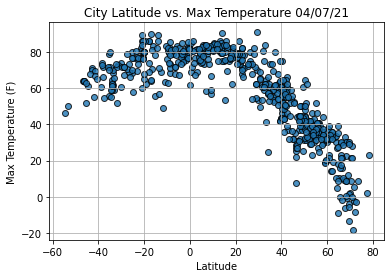

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

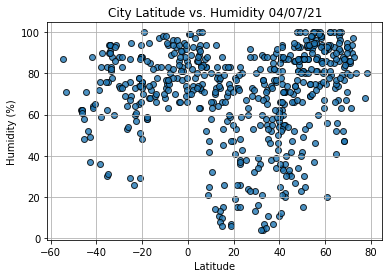

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

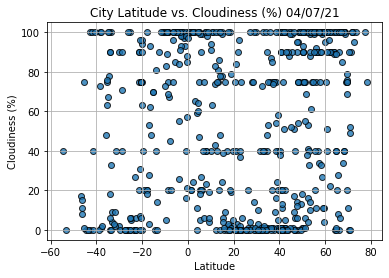

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

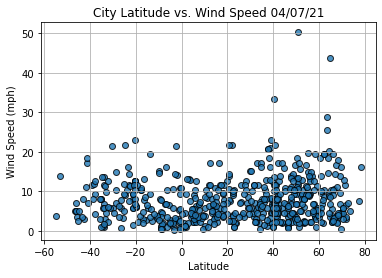

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                     Westport
Lat                       41.1415
Lng                      -73.3579
Max Temp                       55
Humidity                       62
Cloudiness                      1
Wind Speed                   11.5
Country                        US
Date          2021-04-08 00:52:22
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
567    False
568     True
569     True
570     True
571    False
Name: Lat, Length: 572, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Dingle,10.9995,122.6711,83.17,66,100,8.43,PH,2021-04-08 00:52:17
2,Kisangani,0.5167,25.2000,69.03,99,100,1.03,CD,2021-04-08 00:52:18
3,Albany,42.6001,-73.9662,59.00,55,20,6.91,US,2021-04-08 00:52:18
4,Bonthe,7.5264,-12.5050,79.18,87,100,5.30,SL,2021-04-08 00:52:19
5,Wexford,52.3342,-6.4575,42.01,87,41,8.88,IE,2021-04-08 00:52:19


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

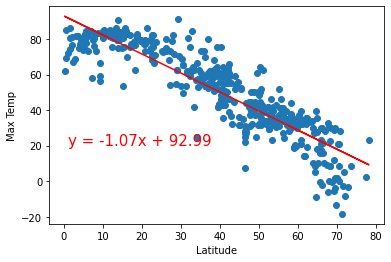

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(1,20))

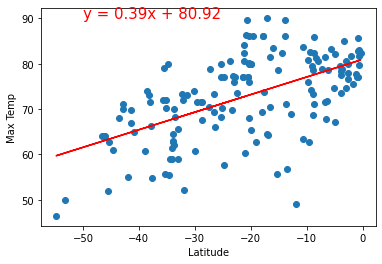

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

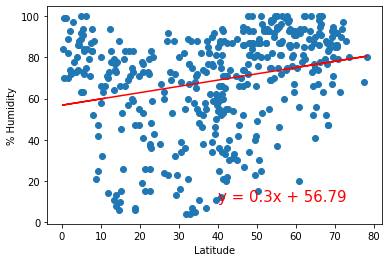

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

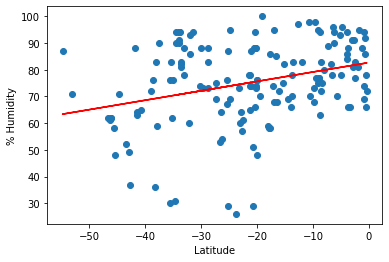

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

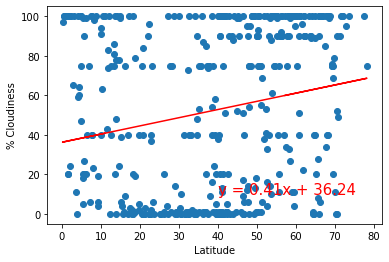

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

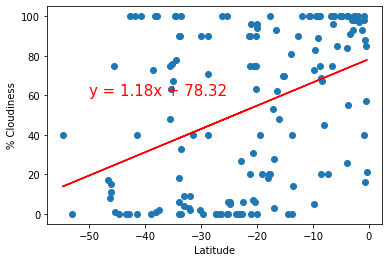

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

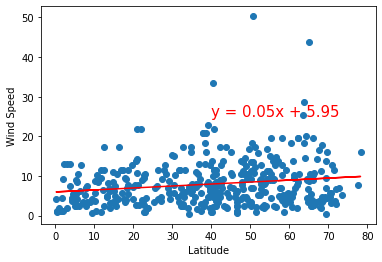

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

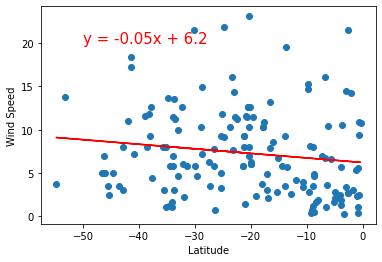

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))